In [1]:
# 필수 라이브러리 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 설정
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial', 'sans-serif']
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")


In [2]:
# 데이터 로딩
print("📂 데이터 로딩 중...")

try:
    train_df = pd.read_csv('data/train.csv', encoding='utf-8')
    test_df = pd.read_csv('data/test.csv', encoding='utf-8')
    building_info_df = pd.read_csv('data/building_info.csv', encoding='utf-8')

    print("✅ 모든 파일 로딩 성공!")

    # 기본 정보 출력
    print(f"\n📊 데이터셋 기본 정보:")
    print(f"- 학습 데이터: {train_df.shape[0]:,} 행 × {train_df.shape[1]} 열")
    print(f"- 테스트 데이터: {test_df.shape[0]:,} 행 × {test_df.shape[1]} 열")
    print(f"- 건물 정보: {building_info_df.shape[0]} 건물")
    print(f"- 건물 번호 범위: {train_df['건물번호'].min()} ~ {train_df['건물번호'].max()}")
    # 데이터 구조 상세 분석
    print("🔍 학습 데이터 상세 정보:")
    print(train_df.info())

    print("\n📈 타겟 변수 (전력소비량) 기본 통계:")
    print(train_df['전력소비량(kWh)'].describe())

    print("\n🏢 건물 유형 분포:")
    print(building_info_df['건물유형'].value_counts())
except FileNotFoundError as e:
    print(f"❌ 파일을 찾을 수 없습니다: {e}")
    print("💡 2025_train.csv, 2025_test.csv, 2025_building_info.csv 파일이 현재 디렉토리에 있는지 확인해주세요.")

📂 데이터 로딩 중...
✅ 모든 파일 로딩 성공!

📊 데이터셋 기본 정보:
- 학습 데이터: 204,000 행 × 10 열
- 테스트 데이터: 16,800 행 × 7 열
- 건물 정보: 100 건물
- 건물 번호 범위: 1 ~ 100
🔍 학습 데이터 상세 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB
None

📈 타겟 변수 (전력소비량) 기본 통계:
count    204000.000000
mean       3329.575857
std        3689.102792
min           0.000000
25%        1176.

✅ NanumGothic 폰트 경로 적용 완료: /Users/donghun2/Library/Fonts/NanumGothic-Regular.ttf
📊 전력 소비량 예측 모델 분석을 시작합니다!


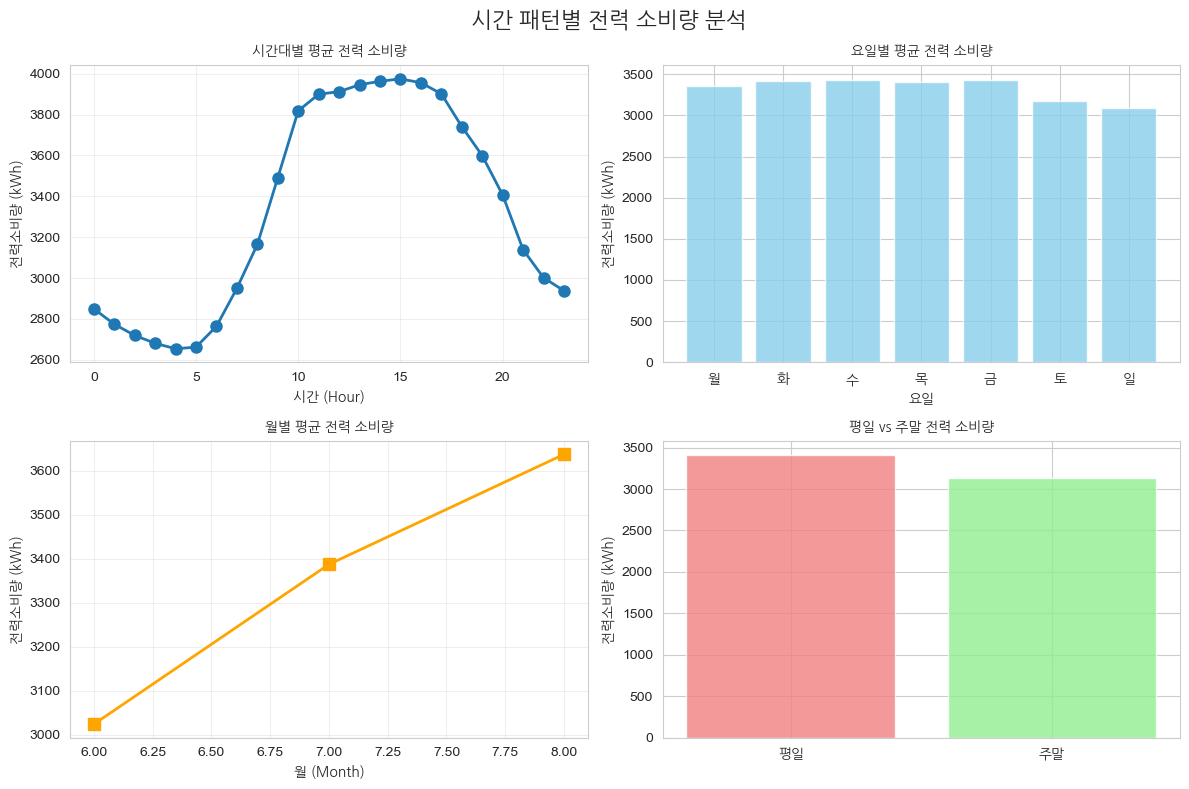

📊 시간 패턴 분석 결과:
- 최대 소비 시간대: 15시 (3975.0 kWh)
- 최소 소비 시간대: 4시 (2654.1 kWh)
- 평일 평균: 3410.3 kWh, 주말 평균: 3135.8 kWh
결론 인사이트

1. 시간대별 패턴 (좌상단):
하루 중 전력 소비는 새벽 4-5시에 최저점을 찍고, 낮 시간 동안 급격히 증가하여 오후 3-4시에 최고조에 달합니다.
이는 사람들의 일과 시간과 밀접한 관련이 있는 전형적인 패턴입니다.

--------------------------------------------
2. 요일별 패턴 (우상단):
평일(월-금)의 전력 소비량은 비슷하게 높은 수준을 유지하다가 주말(토, 일)에는 감소합니다. 특히 일요일의 소비량 감소가 가장 큽니다.
이는 주말에 상업 및 업무 시설의 운영이 줄어들기 때문입니다.

--------------------------------------------
3. 월별 패턴 (좌하단):
데이터가 포함된 6월에서 8월로 갈수록 전력 소비량이 꾸준히 증가합니다.
이는 여름철로 접어들면서 기온이 상승함에 따라 냉방 수요가 지속적으로 늘어났을 것으로 예상됩니다.

--------------------------------------------
4.주중 vs 주말 비교 (우하단):
평일의 평균 전력 소비량이 주말보다 확연히 높다는 것을 다시 한번 확인할 수 있으며,
이는 요일별 분석 결과를 요약적으로 보여줍니다.



In [5]:
# 필수 라이브러리 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import font_manager as fm
import logging

# 경고 무시 설정 (findfont 경고 제거)
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# NanumGothic 폰트 경로 지정
font_path = '/Users/donghun2/Library/Fonts/NanumGothic-Regular.ttf'
nanum_font = fm.FontProperties(fname=font_path)

# Seaborn 스타일
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print(f"✅ NanumGothic 폰트 경로 적용 완료: {font_path}")
print("📊 전력 소비량 예측 모델 분석을 시작합니다!")

# 시간 변수 생성
train_df['일시'] = pd.to_datetime(train_df['일시'])
train_df['hour'] = train_df['일시'].dt.hour
train_df['dayofweek'] = train_df['일시'].dt.dayofweek
train_df['month'] = train_df['일시'].dt.month
train_df['is_weekend'] = (train_df['dayofweek'] >= 5).astype(int)

# 시간대별 전력 소비량 패턴
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('⏰ 시간 패턴별 전력 소비량 분석', fontsize=16, fontweight='bold', fontproperties=nanum_font)

# 1. 시간대별 평균 소비량
hourly_avg = train_df.groupby('hour')['전력소비량(kWh)'].mean()
axes[0, 0].plot(hourly_avg.index, hourly_avg.values, 'o-', linewidth=2, markersize=8)
axes[0, 0].set_title('시간대별 평균 전력 소비량', fontweight='bold', fontproperties=nanum_font)
axes[0, 0].set_xlabel('시간 (Hour)', fontproperties=nanum_font)
axes[0, 0].set_ylabel('전력소비량 (kWh)', fontproperties=nanum_font)
axes[0, 0].grid(True, alpha=0.3)

# 2. 요일별 평균 소비량
days = ['월', '화', '수', '목', '금', '토', '일']
daily_avg = train_df.groupby('dayofweek')['전력소비량(kWh)'].mean()
axes[0, 1].bar(range(7), daily_avg.values, color='skyblue', alpha=0.8)
axes[0, 1].set_title('요일별 평균 전력 소비량', fontweight='bold', fontproperties=nanum_font)
axes[0, 1].set_xlabel('요일', fontproperties=nanum_font)
axes[0, 1].set_ylabel('전력소비량 (kWh)', fontproperties=nanum_font)
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(days, fontproperties=nanum_font)

# 3. 월별 평균 소비량
monthly_avg = train_df.groupby('month')['전력소비량(kWh)'].mean()
axes[1, 0].plot(monthly_avg.index, monthly_avg.values, 's-', linewidth=2, markersize=8, color='orange')
axes[1, 0].set_title('월별 평균 전력 소비량', fontweight='bold', fontproperties=nanum_font)
axes[1, 0].set_xlabel('월 (Month)', fontproperties=nanum_font)
axes[1, 0].set_ylabel('전력소비량 (kWh)', fontproperties=nanum_font)
axes[1, 0].grid(True, alpha=0.3)

# 4. 평일 vs 주말
# 평일 vs 주말
weekend_avg = train_df.groupby('is_weekend')['전력소비량(kWh)'].mean()
bars = axes[1, 1].bar([0, 1], weekend_avg.values, color=['lightcoral', 'lightgreen'], alpha=0.8)

# x축 레이블 강제 적용
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['평일', '주말'], fontproperties=nanum_font)

# 제목, y축 레이블에도 font 적용
axes[1, 1].set_title('평일 vs 주말 전력 소비량', fontweight='bold', fontproperties=nanum_font)
axes[1, 1].set_ylabel('전력소비량 (kWh)', fontproperties=nanum_font)

plt.tight_layout()
plt.show()

print("📊 시간 패턴 분석 결과:")
print(f"- 최대 소비 시간대: {hourly_avg.idxmax()}시 ({hourly_avg.max():.1f} kWh)")
print(f"- 최소 소비 시간대: {hourly_avg.idxmin()}시 ({hourly_avg.min():.1f} kWh)")
print(f"- 평일 평균: {weekend_avg[0]:.1f} kWh, 주말 평균: {weekend_avg[1]:.1f} kWh")

print("결론 인사이트")
print("""
1. 시간대별 패턴 (좌상단):
하루 중 전력 소비는 새벽 4-5시에 최저점을 찍고, 낮 시간 동안 급격히 증가하여 오후 3-4시에 최고조에 달합니다.
이는 사람들의 일과 시간과 밀접한 관련이 있는 전형적인 패턴입니다.

--------------------------------------------
2. 요일별 패턴 (우상단):
평일(월-금)의 전력 소비량은 비슷하게 높은 수준을 유지하다가 주말(토, 일)에는 감소합니다. 특히 일요일의 소비량 감소가 가장 큽니다.
이는 주말에 상업 및 업무 시설의 운영이 줄어들기 때문입니다.

--------------------------------------------
3. 월별 패턴 (좌하단):
데이터가 포함된 6월에서 8월로 갈수록 전력 소비량이 꾸준히 증가합니다.
이는 여름철로 접어들면서 기온이 상승함에 따라 냉방 수요가 지속적으로 늘어났을 것으로 예상됩니다.

--------------------------------------------
4.주중 vs 주말 비교 (우하단):
평일의 평균 전력 소비량이 주말보다 확연히 높다는 것을 다시 한번 확인할 수 있으며,
이는 요일별 분석 결과를 요약적으로 보여줍니다.
""")

In [ ]:
# 건물 정보 전처리
building_info_df[['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']] = \
    building_info_df[['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']].replace('-', 0).astype(float)

# 학습 데이터와 건물 정보 결합
train_with_building = pd.merge(train_df, building_info_df, on='건물번호', how='left')

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import warnings
import logging

# 경고 무시 설정 (findfont 경고 제거)
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# NanumGothic 폰트 경로 지정
font_path = '/Users/donghun2/Library/Fonts/NanumGothic-Regular.ttf'
nanum_font = fm.FontProperties(fname=font_path)

# 건물 유형별 전력 소비량 분석
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🏢 건물 특성별 전력 소비량 분석', fontsize=16, fontweight='bold', fontproperties=nanum_font)

# 1. 건물 유형별 박스플롯
building_types = train_with_building['건물유형'].unique()
building_data = [train_with_building[train_with_building['건물유형'] == bt]['전력소비량(kWh)'].values
                for bt in building_types]

axes[0, 0].boxplot(building_data, labels=building_types)
axes[0, 0].set_title('건물 유형별 전력 소비량 분포', fontweight='bold', fontproperties=nanum_font)
axes[0, 0].set_ylabel('전력소비량 (kWh)', fontproperties=nanum_font)
axes[0, 0].set_xticklabels(building_types, fontproperties=nanum_font, rotation=45)

axes[0, 0].tick_params(axis='x', rotation=45)

# 2. 연면적 vs 전력소비량
building_summary = train_with_building.groupby('건물번호').agg({
    '전력소비량(kWh)': 'mean',
    '연면적(m2)': 'first',
    '건물유형': 'first'
}).reset_index()

scatter = axes[0, 1].scatter(building_summary['연면적(m2)'], building_summary['전력소비량(kWh)'],
                           alpha=0.7, s=50)
axes[0, 1].set_title('연면적 vs 평균 전력 소비량', fontweight='bold', fontproperties=nanum_font)
axes[0, 1].set_xlabel('연면적 (m²)', fontproperties=nanum_font)
axes[0, 1].set_ylabel('평균 전력소비량 (kWh)', fontproperties=nanum_font)

# 상관계수 표시
correlation = building_summary['연면적(m2)'].corr(building_summary['전력소비량(kWh)'])
axes[0, 1].text(0.05, 0.95, f'상관계수: {correlation:.3f}', transform=axes[0, 1].transAxes,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontproperties=nanum_font)

# 3. 건물별 시간대 패턴 (상위 5개 건물)
top_buildings = train_df.groupby('건물번호')['전력소비량(kWh)'].mean().nlargest(5)

for i, (building_num, avg_consumption) in enumerate(top_buildings.items()):
    building_hourly = train_df[train_df['건물번호'] == building_num].groupby('hour')['전력소비량(kWh)'].mean()
    axes[1, 0].plot(building_hourly.index, building_hourly.values, 'o-',
                   label=f'건물 {building_num}', alpha=0.8, linewidth=2)

axes[1, 0].set_title('상위 5개 건물의 시간대별 패턴', fontweight='bold', fontproperties=nanum_font)
axes[1, 0].set_xlabel('시간 (Hour)', fontproperties=nanum_font)
axes[1, 0].set_ylabel('평균 전력소비량 (kWh)', fontproperties=nanum_font)
axes[1, 0].legend(prop=nanum_font)
axes[1, 0].grid(True, alpha=0.3)

# 4. 에너지 설비 현황
energy_facilities = building_info_df[['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']]
facility_counts = (energy_facilities > 0).sum()

bars = axes[1, 1].bar(facility_counts.index, facility_counts.values,
              color=['gold', 'lightblue', 'lightgreen'], alpha=0.8)
axes[1, 1].set_title('에너지 설비 보유 건물 수', fontweight='bold', fontproperties=nanum_font)
axes[1, 1].set_ylabel('건물 수', fontproperties=nanum_font)
axes[1, 1].set_xticklabels(facility_counts.index, fontproperties=nanum_font, rotation=15)

plt.tight_layout()
plt.show()

print("🏢 건물 특성 분석 결과:")
print(f"- 총 건물 수: {len(building_summary)} 개")
print(f"- 최대 소비 건물: {building_summary.loc[building_summary['전력소비량(kWh)'].idxmax(), '건물번호']}번")
print(f"- 연면적-전력소비량 상관계수: {correlation:.3f}")
print(f"- 태양광 설비 보유: {facility_counts['태양광용량(kW)']} 건물")
print("=============================================================")
print("""
1. 건물 유형별 소비량 (좌상단):
**IDC(인터넷 데이터 센터)**와 백화점의 전력 소비량이 다른 건물 유형에 비해 압도적으로 높고, 값의 분포 범위도 넓습니다.
이는 24시간 서버를 가동해야 하는 IDC와 넓은 공간의 냉난방 및 조명을 유지해야 하는 백화점의 특성 때문으로 보입니다.
반면 아파트, 학교, 공공시설 등은 상대적으로 소비량이 적습니다.

--------------------------------------------
2. 연면적과 평균 전력 소비량 (우상단):
건물의 연면적이 넓을수록 평균 전력 소비량이 증가하는 경향을 보입니다 (상관계수: 0.389).
하지만 모든 대형 건물이 전력을 많이 쓰는 것은 아니며, 면적 외 다른 요인도 크게 작용함을 알 수 있습니다.
이는 약한 양의 상관관계를 의미합니다.

--------------------------------------------
3. 상위 5개 건물의 시간대별 소비 패턴 (좌하단):
전력 소비 상위 건물들은 유사한 소비 패턴을 보입니다. 주로 오전 9시부터 소비량이 증가하여 오후 3-5시경에 최대치를 기록하고, 이후 점차 감소합니다.
이는 주간 업무 및 활동 시간에 전력 사용이 집중되는 전형적인 상업용 건물의 패턴입니다.

--------------------------------------------
4.에너지 설비 보유 건물 수 (우하단):
분석 대상 건물 중 **태양광 발전 설비(태양광용량)**를 보유한 건물이 가장 많습니다.
이는 신재생에너지 보급 정책의 영향으로 해석할 수 있으며, 에너지 저장 장치(ESS)나 전력 변환 장치(PCS)는 상대적으로 적게 보급되어 있음을 보여줍니다.
""")

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothic-Regular.ttf'

Error in callback <function _draw_all_if_interactive at 0x167a30220> (for post_execute), with arguments args (),kwargs {}:


FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothic-Regular.ttf'

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothic-Regular.ttf'

<Figure size 1600x1200 with 4 Axes>